
Name:Yuqi Wang   
NetID:yw545


## Problem 1

$f(x) = x^2$, $f'(x) = 2x$, $\alpha=\beta=0.5$, $x^{(0)}=1$, $\Delta x^{(0)}=-f'(x^{(0)}) = -2$   
$x^{(k+1)}= x^{(k)}+\beta^n \Delta x^{(k)}$ s.t. $f(x^{(k)}+\beta^n \Delta x^{(k)}) \leq f(x^{(k)}) + \alpha\beta^n \Delta x^{(k)}f'(x^{(k)})$

Now we starts with $n=0$ to get $x^{(1)}$:  
$f(x^{(0)}) = 1$, $f'(x^{(0)}) = 2$  
As $n=0$,  
$x^{(1)} = x^{(0)} + 1*(-2) = -1$  
$f(x^{(0)}+\beta^n \Delta x^{(0)}) = f(-1) = 1$  
$f(x^{(0)}) + \alpha\beta^n \Delta x^{(0)}f'(x^{(0)}) = 1 + 0.5*1*(-2)*2 = -1$  
$f(x^{(0)}+\beta^n \Delta x^{(0)}) > f(x^{(0)}) + \alpha\beta^n \Delta x^{(0)}f'(x^{(0)})$ so it doesn't work.  
As $n=1$,
$x^{(1)} = x^{(0)} + 0.5*(-2) = 0$  
$f(x^{(0)}+\beta^n \Delta x^{(0)}) = f(0) = 0$  
$f(x^{(0)}) + \alpha\beta^n \Delta x^{(0)}f'(x^{(0)}) = 1 + 0.5*0.5*(-2)*2 = 0$  
$f(x^{(0)}+\beta^n \Delta x^{(0)}) = f(x^{(0)}) + \alpha\beta^n \Delta x^{(0)}f'(x^{(0)})$ so it works.  
Therefore, $x^{(1)} = 0$  
  
Now we starts with $n=0$ to get $x^{(2)}$:  
$f(x^{(1)}) = 0$, $f'(x^{(1)}) = 0$   
Since $\Delta x^{(1)}= - f'(x^{(1)}) = 0$,  
$f(x^{(1)}+\beta^n \Delta x^{(1)}) = 0 = f(x^{(1)}) + \alpha\beta^n \Delta x^{(1)}f'(x^{(1)})$ so it works.   
so $x^{(2)} = 0$

**Answer: $x^{(1)} = 0$ and $x^{(2)} = 0$**

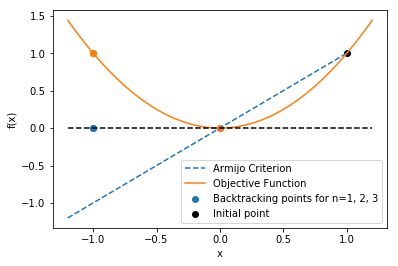

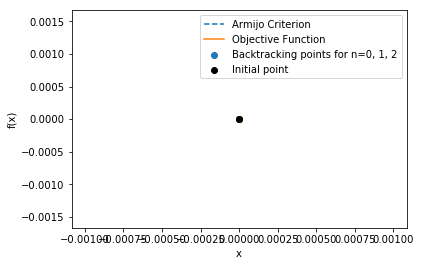

In [11]:
import numpy as np # Namespace is np
import matplotlib.pyplot as plt # Namespace is plt

def backtracking1D(x0, dx, f, df0, alpha=0.5, beta=0.5, verbose=False):
    '''
    Backtracking for 1D functions with illustrations
    :param x0: Previous point from backtracking, or initial guess
    :param dx: Incremental factor for updating x0
    :param f: Objective function
    :param df0: Derivative of f at x0
    :param alpha: Sloping factor of stopping criterion
    :param beta: "Agressiveness" parameter for backtracking steps
    :param verbose: Boolean for providing plots to illustrate
    :return: x1, the next iterate in backtracking
    '''
    
    if verbose:
        n=0
        xs = [x0 + dx] * 3
    
    ######################################
    # The core of the algorithm
    ######################################
    delta = alpha * dx * df0 # Just precomputing the alpha times increment times derivative factor
    t = 1 # Initialize t=beta^0
    f0 = f(x0) # Evaluate for future use
    x = x0 + dx # Initialize x_{0, inner}
    fx = f(x)
    while (not np.isfinite(fx)) or f0 + delta * t < fx:
        t = beta * t
        x = x0 + t * dx
        fx = f(x)
    ###################################### 
    
        if verbose:
            n += 1
            xs.append(x)
            xs.pop(0)
            
    if verbose: 
        u = 1.1 * np.abs(xs[0] - x0)
        l = 0.1 * np.abs(xs[0] - x0)
        if dx < 0:
            s = np.linspace(x0 - u, x0 + l, 100)
            xi = [x0-u, x0]
            fxi = [f(x0) - alpha*u*df0, f(x0)]
        else:
            s = np.linspace(x0 - l, x0 + u, 100)
            xi = [x0, x0 + u]
            fxi = [f(x0), f(x0) + alpha*u*df0]
            
        y = np.zeros(len(s))
        for i in range(len(s)):
            y[i] = f(s[i]) # Slow for vectorized functions
            
        plt.figure('Backtracking illustration')
        arm, =plt.plot(xi, fxi, '--', label='Armijo Criterion')
        fcn, =plt.plot(s, y, label='Objective Function')
        plt.plot([s[0], s[-1]], [0, 0], 'k--')
        pts =plt.scatter(xs, [0 for p in xs], label='Backtracking points for n=%d, %d, %d' % (n, n+1, n+2))
        plt.scatter(xs, [f(p) for p in xs], label='Backtracking points for n=%d, %d, %d' % (n, n+1, n+2))
        init =plt.scatter([x0], [f(x0)], color='black', label='Initial point')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.legend(handles=[arm, fcn, pts, init])
        plt.show()
    
    return x


fun = lambda x: x**2
dfun = lambda x: 2*x

x0 = 1
dx = -dfun(x0)

alpha = 0.5
beta = 0.5

# First backtracking step
x1 = backtracking1D(x0, dx, fun, dfun(x0), alpha=alpha, beta=beta, verbose=True)

# Second backtracking step
x2 = backtracking1D(x1, -dfun(x1), fun, dfun(x1), alpha=alpha, beta=beta, verbose=True)

## Problem 2

First of all, we should take derivative of $g(x)=f(x^{(k)})+f'(x^{(k)})(x-x^{(k)})+\frac{1}{2}f''(x^{(k)})(x-x^{(k)})^2$ with respect to $x$.    
Then we get $g'(x)=f'(x^{(k)})+f''(x^{(k)})(x-x^{(k)})$. Set $g'(x)==0$.  
Then we get $(x-x^{(k)}) = - \frac{f'(x^{(k)})}{f''(x^{(k)})}$.  
It is the same as the Newton update $\Delta x^{(k)} =  - \frac{f'(x^{(k)})}{f''(x^{(k)})}$.  
If $f$ is also convex, then we can say that this critical point is the minimizer of $f$.


## Problem 3
### part (a)
$f(x) = \frac{e^x}{x}$  
$f'(x) = \frac{e^x}{x} - \frac{e^x}{x^2}$  
$f''(x) = \frac{e^x}{x} - \frac{2e^x}{x^2}- \frac{2e^x}{x^3}$


C:\Users\45336\Anaconda3\lib\site-packages\ipykernel_launcher.py:84: RuntimeWarning: overflow encountered in exp


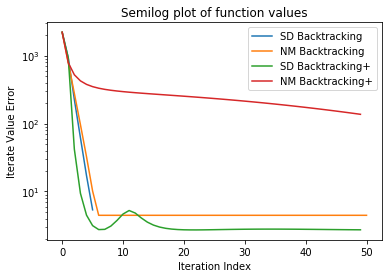

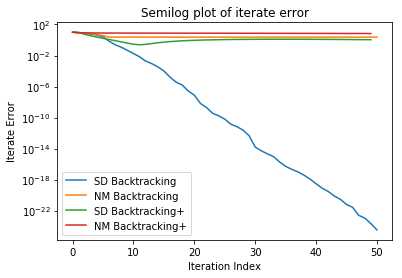

In [33]:

import numpy as np # Namespace is np
import matplotlib.pyplot as plt # Namespace is plt
import math


'''
*****************accelerated backtracking function*******************
'''

def accelerated_backtracking1D(k, tk, x0, x1, dx, f, df, beta=0.5, verbose=False):
    '''
    Accelerated backtracking for 1D functions with illustrations
    :param k: Index of the current accelerated backtracking iteration; k=1 for the first
    :param tk: The t from the previous accelerated backtracking iteration; tk=1 for the first
    :param x0: Next most recent point from accelerated backtracking
    :param x1: Most recent point from accelerated backtracking; x1=x0 for the first iteration
    :param dx: Incremental factor for updating x1
    :param f: Objective function
    :param df: Derivative function of f
    :param beta: "Agressiveness" parameter for backtracking steps
    :param verbose: Boolean for providing plots to illustrate
    :return: x, t the next iterate and initial t in accelerated backtracking
    '''
    
    y = x1 + (k-1)*(x1 - x0)/(k+2) # Base point for accelerated backtracking
    
    if verbose:
        n=0
        xs = [y + tk*dx] * 3
    
    t = tk # Initialize t from the last iteration; t_0=1
    x = y + t*dx
    fx = f(x)
    fy = f(y)
    dfy = df(y)
    delta = dfy * dx

    
    while (not np.isfinite(fx)) or fy + delta*t + t*dx**2/2 < fx:
        t = beta * t
        x = y + t*dx
        fx = f(x)
    
        if verbose:
            n += 1
            xs.append(x)
            xs.pop(0)
            
    if verbose: 
        u = 1.1 * np.abs(xs[0] - y)
        l = 0.1 * np.abs(xs[0] - y)
        if dx < 0:
            s = np.linspace(y - u, y + l, 100)
            xi = np.linspace(y-u, y, 100)
        else:
            s = np.linspace(y - l, y + u, 100)
            xi = np.linspace(y, y + u, 100)
        dxi = xi-y
        fxi = fy + dfy*dxi + dxi*dx/2
            
        z = np.zeros(len(s))
        for i in range(len(s)):
            z[i] = f(s[i]) # Slow for vectorized functions
            
        plt.figure('Accelerated Backtracking illustration')
        plt.plot([s[0], s[-1]], [0, 0], 'k--')
        arm, =plt.plot(xi, fxi, '--', label='Stopping Criterion')
        fcn, =plt.plot(s, z, label='Objective Function')
        pts =plt.scatter(xs, [0 for p in xs], label='Backtracking points for n=%d, %d, %d' % (n, n+1, n+2))
        plt.scatter(xs, [f(p) for p in xs], label='Backtracking points for n=%d, %d, %d' % (n, n+1, n+2))
        init =plt.scatter([y], [fy], label='Initial point', color='black')
        plt.legend(handles=[arm, fcn, pts, init])
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.show()
    
    return x, t

'''
*****************Start with x0 = 10*******************
'''

f = lambda x: np.exp(x)/x
df = lambda x: np.exp(x)/x - np.exp(x)/x**2
d2f = lambda x: np.exp(x)/x - 2*np.exp(x)/x**2 - 2*np.exp(x)/x**3

iter = 50 # 50 iterations of each
x0 = 10
'''
backtracking with steepest desent
'''
x_sd_bt = [x0]
f_sd_bt = [f(x0)]
x = x0
for i in range(iter):
    x = backtracking1D(x, -df(x), f, df(x))
    x_sd_bt.append(x)
    f_sd_bt.append(f(x))
'''
backtracking with Newton's method
'''
x_nm_bt = [x0]
f_nm_bt = [f(x0)]
x = x0
for i in range(iter):
    x = backtracking1D(x, -df(x)/d2f(x), f, df(x))
    x_nm_bt.append(x)
    f_nm_bt.append(f(x))

'''
accelerated backtracking with steepest desent
'''
x_sd_abt = [x0]
f_sd_abt = [f(x0)]
x = backtracking1D(x0, -df(x0), f, df(x0))
x_sd_abt.append(x)
f_sd_abt.append(f(x))
t = 1
for i in range(2,iter):
    x, t = accelerated_backtracking1D(i+1, t, x_sd_abt[i-2], x_sd_abt[i-1], -df(x), f, df)
    x_sd_abt.append(x)
    f_sd_abt.append(f(x))

'''
accelerated backtracking with Newton's method
'''
x_nm_abt = [x0]
f_nm_abt = [f(x0)]
x = backtracking1D(x0, -df(x0)/d2f(x0), f, df(x0))
x_nm_abt.append(x)
f_nm_abt.append(f(x))
t = 1
for i in range(2, iter):
    x, t = accelerated_backtracking1D(i+1, t, x_nm_abt[i-2], x_nm_abt[i-1], -df(x)/d2f(x), f, df)
    x_nm_abt.append(x)
    f_nm_abt.append(f(x))

# Compare convergence of function values with semilog plot

sd_bt, = plt.semilogy(f_sd_bt, label='SD Backtracking')
nm_bt, = plt.semilogy(f_nm_bt, label='NM Backtracking')
sd_abt, = plt.semilogy(f_sd_abt, label='SD Backtracking+')
nm_abt, = plt.semilogy(f_nm_abt, label='NM Backtracking+')
plt.xlabel('Iteration Index')
plt.ylabel('Iterate Value Error')
plt.legend(handles=[sd_bt, nm_bt, sd_abt, nm_abt])
plt.title('Semilog plot of function values')
plt.show()

# Compare convergece of iterates to the minimizer
sd_bt, = plt.semilogy(np.abs(x_sd_bt), label='SD Backtracking')
nm_bt, = plt.semilogy(np.abs(x_nm_bt), label='NM Backtracking')
sd_abt, = plt.semilogy(np.abs(x_sd_abt), label='SD Backtracking+')
nm_abt, = plt.semilogy(np.abs(x_nm_abt), label='NM Backtracking+')
plt.xlabel('Iteration Index')
plt.ylabel('Iterate Error')
plt.legend(handles=[sd_bt, nm_bt, sd_abt, nm_abt])
plt.title('Semilog plot of iterate error')
plt.show()



**Comment: **  
As $x_0 = 10$, for the convergence of the function values, the accelerated backtracking using increments from Newton's method is not really good compared with other three methods.   
However, for the convergence of the iterates, the accelerated backtracking using increments from Newton's method and the accelerated backtracking using increments from steepest descent, and the backtracking using increments from Newton's method all have the similiar rates of convergence. Only the backtracking using increments from steepest descent has a greater rate of convergence.


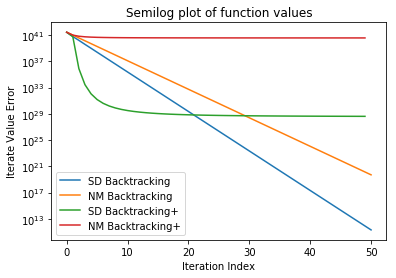

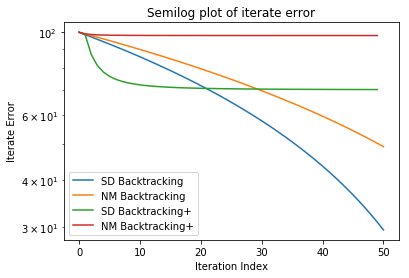

In [34]:
'''
***************** x0 = 100*******************
'''

f = lambda x: np.exp(x)/x
df = lambda x: np.exp(x)/x - np.exp(x)/x**2
d2f = lambda x: np.exp(x)/x - 2*np.exp(x)/x**2 - 2*np.exp(x)/x**3

iter = 50 # 50 iterations of each
x0 = 100
'''
backtracking with steepest desent
'''
x_sd_bt = [x0]
f_sd_bt = [f(x0)]
x = x0
for i in range(iter):
    x = backtracking1D(x, -df(x), f, df(x))
    x_sd_bt.append(x)
    f_sd_bt.append(f(x))
'''
backtracking with Newton's method
'''
x_nm_bt = [x0]
f_nm_bt = [f(x0)]
x = x0
for i in range(iter):
    x = backtracking1D(x, -df(x)/d2f(x), f, df(x))
    x_nm_bt.append(x)
    f_nm_bt.append(f(x))

'''
accelerated backtracking with steepest desent
'''
x_sd_abt = [x0]
f_sd_abt = [f(x0)]
x = backtracking1D(x0, -df(x0), f, df(x0))
x_sd_abt.append(x)
f_sd_abt.append(f(x))
t = 1
for i in range(2,iter):
    x, t = accelerated_backtracking1D(i+1, t, x_sd_abt[i-2], x_sd_abt[i-1], -df(x), f, df)
    x_sd_abt.append(x)
    f_sd_abt.append(f(x))

'''
accelerated backtracking with Newton's method
'''
x_nm_abt = [x0]
f_nm_abt = [f(x0)]
x = backtracking1D(x0, -df(x0)/d2f(x0), f, df(x0))
x_nm_abt.append(x)
f_nm_abt.append(f(x))
t = 1
for i in range(2, iter):
    x, t = accelerated_backtracking1D(i+1, t, x_nm_abt[i-2], x_nm_abt[i-1], -df(x)/d2f(x), f, df)
    x_nm_abt.append(x)
    f_nm_abt.append(f(x))

# Compare convergence of function values with semilog plot

sd_bt, = plt.semilogy(f_sd_bt, label='SD Backtracking')
nm_bt, = plt.semilogy(f_nm_bt, label='NM Backtracking')
sd_abt, = plt.semilogy(f_sd_abt, label='SD Backtracking+')
nm_abt, = plt.semilogy(f_nm_abt, label='NM Backtracking+')
plt.xlabel('Iteration Index')
plt.ylabel('Iterate Value Error')
plt.legend(handles=[sd_bt, nm_bt, sd_abt, nm_abt])
plt.title('Semilog plot of function values')
plt.show()

# Compare convergece of iterates to the minimizer
sd_bt, = plt.semilogy(np.abs(x_sd_bt), label='SD Backtracking')
nm_bt, = plt.semilogy(np.abs(x_nm_bt), label='NM Backtracking')
sd_abt, = plt.semilogy(np.abs(x_sd_abt), label='SD Backtracking+')
nm_abt, = plt.semilogy(np.abs(x_nm_abt), label='NM Backtracking+')
plt.xlabel('Iteration Index')
plt.ylabel('Iterate Error')
plt.legend(handles=[sd_bt, nm_bt, sd_abt, nm_abt])
plt.title('Semilog plot of iterate error')
plt.show()



**Comment: **  
As $x_0 = 100$, for the convergence of the function values, the accelerated backtracking using increments from Newton's method has the lowest rate of convergence.As the index is small, the accelerated backtracking using increments from steepest descent has a really large rate, however, as index is greater than $5$, the rate of convergence goes to near $0$. The backtracking using increments from Newton's method and the backtracking using increments from steepest descent both have quite stable rate of convergence, but the backtracking using increments from steepest descent is greater than the backtracking using increments from Newton's method.   
The convergence of the iterates has the similiar situation as the convergence of the function values.

**As $x_0 = 1000$, the program will run into OverFlowError, so we should try to find the minimum of $log(f(x))$ instead of $f(x)$**  
$log(f(x))=log(\frac{e^x}{x})=x-log(x)$  
$(log(f(x)))' = 1-\frac{1}{x}$  
$(log(f(x)))'' = \frac{1}{x^2}$  
for the accelated backtracking with Newton's method, the first $x$ we get for base point is $x= -937.4526977539062 < 0$, besides, $x$ after that will always be negative, so the program will stop. Therefore, the accelated backtracking with Newton's method doesn't work for this case.

C:\Users\45336\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


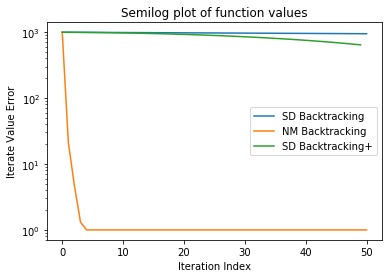

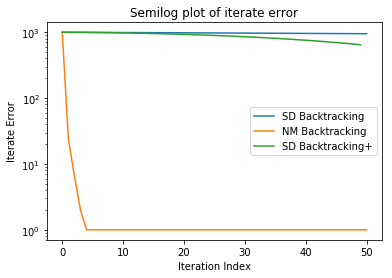

In [30]:
'''
***************** x0 = 1000*******************
'''

f = lambda x: x-np.log(x)
df = lambda x: 1-1/x
d2f = lambda x: 1/x**2

iter = 50 # 50 iterations of each
x0 = 1000


'''
backtracking with steepest desent
'''
x_sd_bt = [x0]
f_sd_bt = [f(x0)]
x = x0
for i in range(iter):
    x = backtracking1D(x, -df(x), f, df(x))
    x_sd_bt.append(x)
    f_sd_bt.append(f(x))
'''
backtracking with Newton's method
'''
x_nm_bt = [x0]
f_nm_bt = [f(x0)]
x = x0
for i in range(iter):
    x = backtracking1D(x, -df(x)/d2f(x), f, df(x))
    x_nm_bt.append(x)
    f_nm_bt.append(f(x))

'''
accelerated backtracking with steepest desent
'''
x_sd_abt = [x0]
f_sd_abt = [f(x0)]
x = backtracking1D(x0, -df(x0), f, df(x0))
x_sd_abt.append(x)
f_sd_abt.append(f(x))
t = 1
for i in range(2,iter):
    x, t = accelerated_backtracking1D(i+1, t, x_sd_abt[i-2], x_sd_abt[i-1], -df(x), f, df)
    x_sd_abt.append(x)
    f_sd_abt.append(f(x))

'''
accelerated backtracking with Newton's method

x_nm_abt = [x0]
f_nm_abt = [f(x0)]
x = backtracking1D(x0, -df(x0)/d2f(x0), f, df(x0))
x_nm_abt.append(x)
f_nm_abt.append(f(x))
t = 1
for i in range(2, iter):
    x, t = accelerated_backtracking1D(i+1, t, x_nm_abt[i-2], x_nm_abt[i-1], -df(x)/d2f(x), f, df)
    x_nm_abt.append(x)
    f_nm_abt.append(f(x))
'''

# Compare convergence of function values with semilog plot

sd_bt, = plt.semilogy(f_sd_bt, label='SD Backtracking')
nm_bt, = plt.semilogy(f_nm_bt, label='NM Backtracking')
sd_abt, = plt.semilogy(f_sd_abt, label='SD Backtracking+')
#nm_abt, = plt.semilogy(f_nm_abt, label='NM Backtracking+')
plt.xlabel('Iteration Index')
plt.ylabel('Iterate Value Error')
plt.legend(handles=[sd_bt, nm_bt, sd_abt])
plt.title('Semilog plot of function values')
plt.show()

# Compare convergece of iterates to the minimizer
sd_bt, = plt.semilogy(np.abs(x_sd_bt), label='SD Backtracking')
nm_bt, = plt.semilogy(np.abs(x_nm_bt), label='NM Backtracking')
sd_abt, = plt.semilogy(np.abs(x_sd_abt), label='SD Backtracking+')
#nm_abt, = plt.semilogy(np.abs(x_nm_abt), label='NM Backtracking+')
plt.xlabel('Iteration Index')
plt.ylabel('Iterate Error')
plt.legend(handles=[sd_bt, nm_bt, sd_abt])
plt.title('Semilog plot of iterate error')
plt.show()



**Comment: **  
As $x_0 = 1000$, for the convergence of the function values and the convergence of the iterates, the backtracking using increments from Newton's method have the highest rate of convergence.  
The backtracking and accelerated backtracking using increments from steepest descent have the lower rate of convergence, which are both near $0$. The accelerated backtracking using increments from steepest descent has a little higher rate of convergence compared with the regular backtracking.

### part (b)
$f(x) = log(x^2 + 1)+log((x-1)^2 +1) + log((x-\frac{3}{2})^2+1)$  
$f'(x) = \frac{2x}{x^2 +1} + \frac{2x-2}{(x-1)^2 +1} + \frac{2x-3}{(x-\frac{3}{2})^2 +1} $  


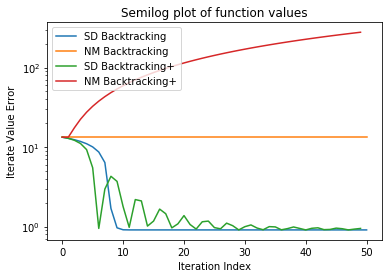

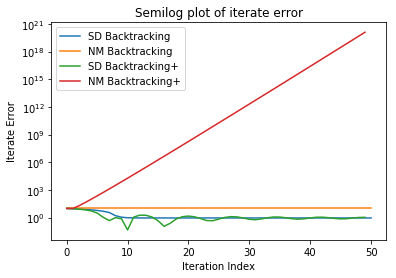

In [15]:
'''
*****************Start with x0 = 10*******************
'''

f = lambda x: math.log(x**2 + 1)+ math.log((x-1)**2 +1) + math.log((x-3/2)**2+1)
df = lambda x: 2*x/(x**2 +1) + (2*x-2)/((x-1)**2 +1) + (2*x-3)/((x-3/2)**2 +1)
d2f = lambda x: 2/(x**2 +1) - (4*x**2)/((x**2+1)**2) - (2*(x-1)*(2*x-2))/(((x-1)**2+1)**2) - (2*(x-3/2)*(2*x-3))/(((x-3/2)**2+1)**2) + 2/((x-1)**2 +1) + 2/((x-3/2)**2 +1)

iter = 50 # 50 iterations of each
x0 = 10
'''
backtracking with steepest desent
'''
x_sd_bt = [x0]
f_sd_bt = [f(x0)]
x = x0
for i in range(iter):
    x = backtracking1D(x, -df(x), f, df(x))
    x_sd_bt.append(x)
    f_sd_bt.append(f(x))
'''
backtracking with Newton's method
'''
x_nm_bt = [x0]
f_nm_bt = [f(x0)]
x = x0
for i in range(iter):
    x = backtracking1D(x, -df(x)/d2f(x), f, df(x))
    x_nm_bt.append(x)
    f_nm_bt.append(f(x))

'''
accelerated backtracking with steepest desent
'''
x_sd_abt = [x0]
f_sd_abt = [f(x0)]
x = backtracking1D(x0, -df(x0), f, df(x0))
x_sd_abt.append(x)
f_sd_abt.append(f(x))
t = 1
for i in range(2,iter):
    x, t = accelerated_backtracking1D(i+1, t, x_sd_abt[i-2], x_sd_abt[i-1], -df(x), f, df)
    x_sd_abt.append(x)
    f_sd_abt.append(f(x))

'''
accelerated backtracking with Newton's method
'''
x_nm_abt = [x0]
f_nm_abt = [f(x0)]
x = backtracking1D(x0, -df(x0)/d2f(x0), f, df(x0))
x_nm_abt.append(x)
f_nm_abt.append(f(x))
t = 1
for i in range(2, iter):
    x, t = accelerated_backtracking1D(i+1, t, x_nm_abt[i-2], x_nm_abt[i-1], -df(x)/d2f(x), f, df)
    x_nm_abt.append(x)
    f_nm_abt.append(f(x))

# Compare convergence of function values with semilog plot

sd_bt, = plt.semilogy(f_sd_bt, label='SD Backtracking')
nm_bt, = plt.semilogy(f_nm_bt, label='NM Backtracking')
sd_abt, = plt.semilogy(f_sd_abt, label='SD Backtracking+')
nm_abt, = plt.semilogy(f_nm_abt, label='NM Backtracking+')
plt.xlabel('Iteration Index')
plt.ylabel('Iterate Value Error')
plt.legend(handles=[sd_bt, nm_bt, sd_abt, nm_abt])
plt.title('Semilog plot of function values')
plt.show()

# Compare convergece of iterates to the minimizer
sd_bt, = plt.semilogy(np.abs(x_sd_bt), label='SD Backtracking')
nm_bt, = plt.semilogy(np.abs(x_nm_bt), label='NM Backtracking')
sd_abt, = plt.semilogy(np.abs(x_sd_abt), label='SD Backtracking+')
nm_abt, = plt.semilogy(np.abs(x_nm_abt), label='NM Backtracking+')
plt.xlabel('Iteration Index')
plt.ylabel('Iterate Error')
plt.legend(handles=[sd_bt, nm_bt, sd_abt, nm_abt])
plt.title('Semilog plot of iterate error')
plt.show()



**Comment: **  
As $x_0 = 10$, for the convergence of the function values, the accelerated backtracking using increments from Newton's method is not even convergent since the error is going up.So it probably because that the double prime of function is negative, so the $\Delta x$ has the same sign of $f'(x)$. Same as the convergence of the iterates.   

The backtracking using increments from Newton's method has a straight line in both figures so it doesn't converge, either. But the error is not going up.

The error for accelerated backtracking using increments from steepest descent is not very stable, but overall the error is going down.

In this case, the backtracking using increments from steepest descent has a relatively high rate of convergence.


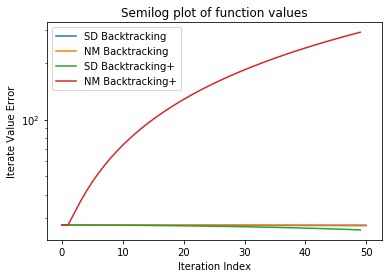

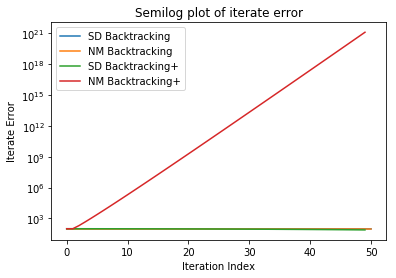

In [16]:
'''
***************** x0 = 100 *******************
'''

f = lambda x: math.log(x**2 + 1)+ math.log((x-1)**2 +1) + math.log((x-3/2)**2+1)
df = lambda x: 2*x/(x**2 +1) + (2*x-2)/((x-1)**2 +1) + (2*x-3)/((x-3/2)**2 +1)
d2f = lambda x: 2/(x**2 +1) - (4*x**2)/((x**2+1)**2) - (2*(x-1)*(2*x-2))/(((x-1)**2+1)**2) - (2*(x-3/2)*(2*x-3))/(((x-3/2)**2+1)**2) + 2/((x-1)**2 +1) + 2/((x-3/2)**2 +1)

iter = 50 # 50 iterations of each
x0 = 100
'''
backtracking with steepest desent
'''
x_sd_bt = [x0]
f_sd_bt = [f(x0)]
x = x0
for i in range(iter):
    x = backtracking1D(x, -df(x), f, df(x))
    x_sd_bt.append(x)
    f_sd_bt.append(f(x))
'''
backtracking with Newton's method
'''
x_nm_bt = [x0]
f_nm_bt = [f(x0)]
x = x0
for i in range(iter):
    x = backtracking1D(x, -df(x)/d2f(x), f, df(x))
    x_nm_bt.append(x)
    f_nm_bt.append(f(x))

'''
accelerated backtracking with steepest desent
'''
x_sd_abt = [x0]
f_sd_abt = [f(x0)]
x = backtracking1D(x0, -df(x0), f, df(x0))
x_sd_abt.append(x)
f_sd_abt.append(f(x))
t = 1
for i in range(2,iter):
    x, t = accelerated_backtracking1D(i+1, t, x_sd_abt[i-2], x_sd_abt[i-1], -df(x), f, df)
    x_sd_abt.append(x)
    f_sd_abt.append(f(x))

'''
accelerated backtracking with Newton's method
'''
x_nm_abt = [x0]
f_nm_abt = [f(x0)]
x = backtracking1D(x0, -df(x0)/d2f(x0), f, df(x0))
x_nm_abt.append(x)
f_nm_abt.append(f(x))
t = 1
for i in range(2, iter):
    x, t = accelerated_backtracking1D(i+1, t, x_nm_abt[i-2], x_nm_abt[i-1], -df(x)/d2f(x), f, df)
    x_nm_abt.append(x)
    f_nm_abt.append(f(x))

# Compare convergence of function values with semilog plot

sd_bt, = plt.semilogy(f_sd_bt, label='SD Backtracking')
nm_bt, = plt.semilogy(f_nm_bt, label='NM Backtracking')
sd_abt, = plt.semilogy(f_sd_abt, label='SD Backtracking+')
nm_abt, = plt.semilogy(f_nm_abt, label='NM Backtracking+')
plt.xlabel('Iteration Index')
plt.ylabel('Iterate Value Error')
plt.legend(handles=[sd_bt, nm_bt, sd_abt, nm_abt])
plt.title('Semilog plot of function values')
plt.show()

# Compare convergece of iterates to the minimizer
sd_bt, = plt.semilogy(np.abs(x_sd_bt), label='SD Backtracking')
nm_bt, = plt.semilogy(np.abs(x_nm_bt), label='NM Backtracking')
sd_abt, = plt.semilogy(np.abs(x_sd_abt), label='SD Backtracking+')
nm_abt, = plt.semilogy(np.abs(x_nm_abt), label='NM Backtracking+')
plt.xlabel('Iteration Index')
plt.ylabel('Iterate Error')
plt.legend(handles=[sd_bt, nm_bt, sd_abt, nm_abt])
plt.title('Semilog plot of iterate error')
plt.show()



**Comment: **  
As $x_0 = 100$, similiar to the case as $x_0 = 10$, for the convergence of the function values, the accelerated backtracking using increments from Newton's method is not even convergent since the error is going up.So it probably because that the double prime of function is negative, so the $\Delta x$ has the same sign of $f'(x)$. Same as the convergence of the iterates.   

The backtracking using increments from Newton's method, the accelerated backtracking using increments from steepest descent, and the backtracking using increments from steepest descent have similiar low rates of convergence.


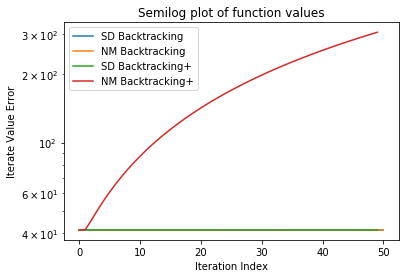

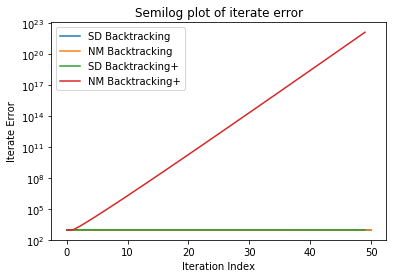

In [17]:
'''
***************** x0 = 1000 *******************
'''

f = lambda x: math.log(x**2 + 1)+ math.log((x-1)**2 +1) + math.log((x-3/2)**2+1)
df = lambda x: 2*x/(x**2 +1) + (2*x-2)/((x-1)**2 +1) + (2*x-3)/((x-3/2)**2 +1)
d2f = lambda x: 2/(x**2 +1) - (4*x**2)/((x**2+1)**2) - (2*(x-1)*(2*x-2))/(((x-1)**2+1)**2) - (2*(x-3/2)*(2*x-3))/(((x-3/2)**2+1)**2) + 2/((x-1)**2 +1) + 2/((x-3/2)**2 +1)

iter = 50 # 50 iterations of each
x0 = 1000
'''
backtracking with steepest desent
'''
x_sd_bt = [x0]
f_sd_bt = [f(x0)]
x = x0
for i in range(iter):
    x = backtracking1D(x, -df(x), f, df(x))
    x_sd_bt.append(x)
    f_sd_bt.append(f(x))
'''
backtracking with Newton's method
'''
x_nm_bt = [x0]
f_nm_bt = [f(x0)]
x = x0
for i in range(iter):
    x = backtracking1D(x, -df(x)/d2f(x), f, df(x))
    x_nm_bt.append(x)
    f_nm_bt.append(f(x))

'''
accelerated backtracking with steepest desent
'''
x_sd_abt = [x0]
f_sd_abt = [f(x0)]
x = backtracking1D(x0, -df(x0), f, df(x0))
x_sd_abt.append(x)
f_sd_abt.append(f(x))
t = 1
for i in range(2,iter):
    x, t = accelerated_backtracking1D(i+1, t, x_sd_abt[i-2], x_sd_abt[i-1], -df(x), f, df)
    x_sd_abt.append(x)
    f_sd_abt.append(f(x))

'''
accelerated backtracking with Newton's method
'''
x_nm_abt = [x0]
f_nm_abt = [f(x0)]
x = backtracking1D(x0, -df(x0)/d2f(x0), f, df(x0))
x_nm_abt.append(x)
f_nm_abt.append(f(x))
t = 1
for i in range(2, iter):
    x, t = accelerated_backtracking1D(i+1, t, x_nm_abt[i-2], x_nm_abt[i-1], -df(x)/d2f(x), f, df)
    x_nm_abt.append(x)
    f_nm_abt.append(f(x))

# Compare convergence of function values with semilog plot

sd_bt, = plt.semilogy(f_sd_bt, label='SD Backtracking')
nm_bt, = plt.semilogy(f_nm_bt, label='NM Backtracking')
sd_abt, = plt.semilogy(f_sd_abt, label='SD Backtracking+')
nm_abt, = plt.semilogy(f_nm_abt, label='NM Backtracking+')
plt.xlabel('Iteration Index')
plt.ylabel('Iterate Value Error')
plt.legend(handles=[sd_bt, nm_bt, sd_abt, nm_abt])
plt.title('Semilog plot of function values')
plt.show()

# Compare convergece of iterates to the minimizer
sd_bt, = plt.semilogy(np.abs(x_sd_bt), label='SD Backtracking')
nm_bt, = plt.semilogy(np.abs(x_nm_bt), label='NM Backtracking')
sd_abt, = plt.semilogy(np.abs(x_sd_abt), label='SD Backtracking+')
nm_abt, = plt.semilogy(np.abs(x_nm_abt), label='NM Backtracking+')
plt.xlabel('Iteration Index')
plt.ylabel('Iterate Error')
plt.legend(handles=[sd_bt, nm_bt, sd_abt, nm_abt])
plt.title('Semilog plot of iterate error')
plt.show()



**Comment: **  
As $x_0 = 1000$, similiar to the case as $x_0 = 100$, for the convergence of the function values, the accelerated backtracking using increments from Newton's method is not even convergent since the error is going up.So it probably because that the double prime of function is negative, so the $\Delta x$ has the same sign of $f'(x)$. Same as the convergence of the iterates.   

The backtracking using increments from Newton's method, the accelerated backtracking using increments from steepest descent, and the backtracking using increments from steepest descent have similiar low rates of convergence.


### part (c)
$f(x) = -\frac{1}{x^2 +1} - \frac{1}{(x-1)^2 +1} - \frac{1}{(x-\frac{3}{2})^2 +1}$  
$f'(x) = \frac{2x}{((x^2 +1)^2} + \frac{2x-2}{((x-1)^2 +1)^2} + \frac{2x-3}{((x-\frac{3}{2})^2 +1)^2} $  


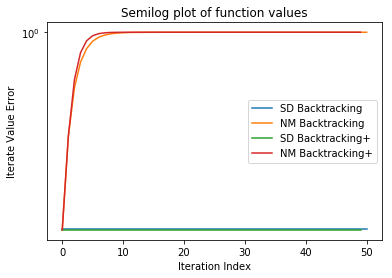

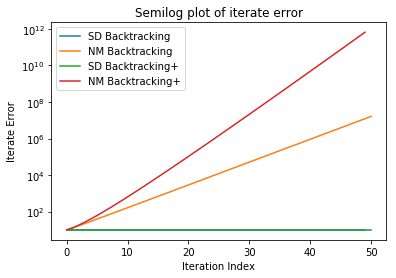

In [48]:
'''
*****************Start with x0 = 10*******************
'''

f = lambda x: 1/(x**2 +1) - 1/((x-1)**2 +1) - 1/((x-3/2)**2 +1)
df = lambda x: 2*x/(x**2 +1)**2 + (2*x-2)/((x-1)**2 +1)**2 + (2*x-3)/((x-3/2)**2 +1)**2
d2f = lambda x: 2/(x**2 +1)**2 - (8*x**2)/((x**2+1)**3) - (4*(x-1)*(2*x-2))/(((x-1)**2+1)**3) - (4*(x-3/2)*(2*x-3))/(((x-3/2)**2+1)**3) + 2/((x-1)**2 +1)**2 + 2/((x-3/2)**2 +1)**2

iter = 50 # 50 iterations of each
x0 = 10
'''
backtracking with steepest desent
'''
x_sd_bt = [x0]
f_sd_bt = [f(x0)]
x = x0
for i in range(iter):
    x = backtracking1D(x, -df(x), f, df(x))
    x_sd_bt.append(x)
    f_sd_bt.append(f(x))
'''
backtracking with Newton's method
'''
x_nm_bt = [x0]
f_nm_bt = [f(x0)]
x = x0
for i in range(iter):
    x = backtracking1D(x, -df(x)/d2f(x), f, df(x))
    x_nm_bt.append(x)
    f_nm_bt.append(f(x))

'''
accelerated backtracking with steepest desent
'''
x_sd_abt = [x0]
f_sd_abt = [f(x0)]
x = backtracking1D(x0, -df(x0), f, df(x0))
x_sd_abt.append(x)
f_sd_abt.append(f(x))
t = 1
for i in range(2,iter):
    x, t = accelerated_backtracking1D(i+1, t, x_sd_abt[i-2], x_sd_abt[i-1], -df(x), f, df)
    x_sd_abt.append(x)
    f_sd_abt.append(f(x))

'''
accelerated backtracking with Newton's method
'''
x_nm_abt = [x0]
f_nm_abt = [f(x0)]
x = backtracking1D(x0, -df(x0)/d2f(x0), f, df(x0))
x_nm_abt.append(x)
f_nm_abt.append(f(x))
t = 1
for i in range(2, iter):
    x, t = accelerated_backtracking1D(i+1, t, x_nm_abt[i-2], x_nm_abt[i-1], -df(x)/d2f(x), f, df)
    x_nm_abt.append(x)
    f_nm_abt.append(f(x))

# Compare convergence of function values with semilog plot

#make the function values positive
f_sd_bt = [x+1.00001 for x in f_sd_bt]
f_nm_bt = [x+1 for x in f_nm_bt]
f_sd_abt = [x+1 for x in f_sd_abt]
f_nm_abt = [x+1 for x in f_nm_abt]

sd_bt, = plt.semilogy(f_sd_bt, label='SD Backtracking')
nm_bt, = plt.semilogy(f_nm_bt, label='NM Backtracking')
sd_abt, = plt.semilogy(f_sd_abt, label='SD Backtracking+')
nm_abt, = plt.semilogy(f_nm_abt, label='NM Backtracking+')
plt.xlabel('Iteration Index')
plt.ylabel('Iterate Value Error')
plt.legend(handles=[sd_bt, nm_bt, sd_abt, nm_abt])
plt.title('Semilog plot of function values')
plt.show()

# Compare convergece of iterates to the minimizer
sd_bt, = plt.semilogy(np.abs(x_sd_bt), label='SD Backtracking')
nm_bt, = plt.semilogy(np.abs(x_nm_bt), label='NM Backtracking')
sd_abt, = plt.semilogy(np.abs(x_sd_abt), label='SD Backtracking+')
nm_abt, = plt.semilogy(np.abs(x_nm_abt), label='NM Backtracking+')
plt.xlabel('Iteration Index')
plt.ylabel('Iterate Error')
plt.legend(handles=[sd_bt, nm_bt, sd_abt, nm_abt])
plt.title('Semilog plot of iterate error')
plt.show()



**Comment:  **  
Comment is below.

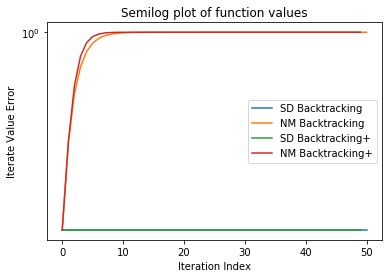

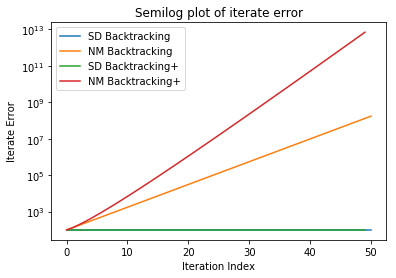

In [50]:
'''
***************** x0 = 100 *******************
'''

f = lambda x: 1/(x**2 +1) - 1/((x-1)**2 +1) - 1/((x-3/2)**2 +1)
df = lambda x: 2*x/(x**2 +1)**2 + (2*x-2)/((x-1)**2 +1)**2 + (2*x-3)/((x-3/2)**2 +1)**2
d2f = lambda x: 2/(x**2 +1)**2 - (8*x**2)/((x**2+1)**3) - (4*(x-1)*(2*x-2))/(((x-1)**2+1)**3) - (4*(x-3/2)*(2*x-3))/(((x-3/2)**2+1)**3) + 2/((x-1)**2 +1)**2 + 2/((x-3/2)**2 +1)**2

iter = 50 # 50 iterations of each
x0 = 100
'''
backtracking with steepest desent
'''
x_sd_bt = [x0]
f_sd_bt = [f(x0)]
x = x0
for i in range(iter):
    x = backtracking1D(x, -df(x), f, df(x))
    x_sd_bt.append(x)
    f_sd_bt.append(f(x))
'''
backtracking with Newton's method
'''
x_nm_bt = [x0]
f_nm_bt = [f(x0)]
x = x0
for i in range(iter):
    x = backtracking1D(x, -df(x)/d2f(x), f, df(x))
    x_nm_bt.append(x)
    f_nm_bt.append(f(x))

'''
accelerated backtracking with steepest desent
'''
x_sd_abt = [x0]
f_sd_abt = [f(x0)]
x = backtracking1D(x0, -df(x0), f, df(x0))
x_sd_abt.append(x)
f_sd_abt.append(f(x))
t = 1
for i in range(2,iter):
    x, t = accelerated_backtracking1D(i+1, t, x_sd_abt[i-2], x_sd_abt[i-1], -df(x), f, df)
    x_sd_abt.append(x)
    f_sd_abt.append(f(x))

'''
accelerated backtracking with Newton's method
'''
x_nm_abt = [x0]
f_nm_abt = [f(x0)]
x = backtracking1D(x0, -df(x0)/d2f(x0), f, df(x0))
x_nm_abt.append(x)
f_nm_abt.append(f(x))
t = 1
for i in range(2, iter):
    x, t = accelerated_backtracking1D(i+1, t, x_nm_abt[i-2], x_nm_abt[i-1], -df(x)/d2f(x), f, df)
    x_nm_abt.append(x)
    f_nm_abt.append(f(x))

# Compare convergence of function values with semilog plot

#make the function values positive
f_sd_bt = [x+1 for x in f_sd_bt]
f_nm_bt = [x+1 for x in f_nm_bt]
f_sd_abt = [x+1 for x in f_sd_abt]
f_nm_abt = [x+1 for x in f_nm_abt]

sd_bt, = plt.semilogy(f_sd_bt, label='SD Backtracking')
nm_bt, = plt.semilogy(f_nm_bt, label='NM Backtracking')
sd_abt, = plt.semilogy(f_sd_abt, label='SD Backtracking+')
nm_abt, = plt.semilogy(f_nm_abt, label='NM Backtracking+')
plt.xlabel('Iteration Index')
plt.ylabel('Iterate Value Error')
plt.legend(handles=[sd_bt, nm_bt, sd_abt, nm_abt])
plt.title('Semilog plot of function values')
plt.show()

# Compare convergece of iterates to the minimizer
sd_bt, = plt.semilogy(np.abs(x_sd_bt), label='SD Backtracking')
nm_bt, = plt.semilogy(np.abs(x_nm_bt), label='NM Backtracking')
sd_abt, = plt.semilogy(np.abs(x_sd_abt), label='SD Backtracking+')
nm_abt, = plt.semilogy(np.abs(x_nm_abt), label='NM Backtracking+')
plt.xlabel('Iteration Index')
plt.ylabel('Iterate Error')
plt.legend(handles=[sd_bt, nm_bt, sd_abt, nm_abt])
plt.title('Semilog plot of iterate error')
plt.show()



**Comment:  **  
Comment is below.

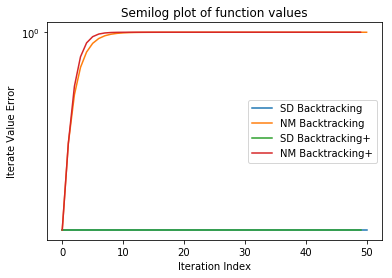

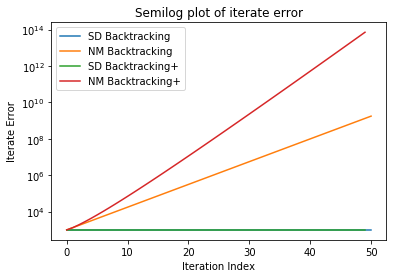

In [54]:
'''
***************** x0 = 1000 *******************
'''

f = lambda x: 1/(x**2 +1) - 1/((x-1)**2 +1) - 1/((x-3/2)**2 +1)
df = lambda x: 2*x/(x**2 +1)**2 + (2*x-2)/((x-1)**2 +1)**2 + (2*x-3)/((x-3/2)**2 +1)**2
d2f = lambda x: 2/(x**2 +1)**2 - (8*x**2)/((x**2+1)**3) - (4*(x-1)*(2*x-2))/(((x-1)**2+1)**3) - (4*(x-3/2)*(2*x-3))/(((x-3/2)**2+1)**3) + 2/((x-1)**2 +1)**2 + 2/((x-3/2)**2 +1)**2

iter = 50 # 50 iterations of each
x0 = 1000
'''
backtracking with steepest desent
'''
x_sd_bt = [x0]
f_sd_bt = [f(x0)]
x = x0
for i in range(iter):
    x = backtracking1D(x, -df(x), f, df(x))
    x_sd_bt.append(x)
    f_sd_bt.append(f(x))
'''
backtracking with Newton's method
'''
x_nm_bt = [x0]
f_nm_bt = [f(x0)]
x = x0
for i in range(iter):
    x = backtracking1D(x, -df(x)/d2f(x), f, df(x))
    x_nm_bt.append(x)
    f_nm_bt.append(f(x))

'''
accelerated backtracking with steepest desent
'''
x_sd_abt = [x0]
f_sd_abt = [f(x0)]
x = backtracking1D(x0, -df(x0), f, df(x0))
x_sd_abt.append(x)
f_sd_abt.append(f(x))
t = 1
for i in range(2,iter):
    x, t = accelerated_backtracking1D(i+1, t, x_sd_abt[i-2], x_sd_abt[i-1], -df(x), f, df)
    x_sd_abt.append(x)
    f_sd_abt.append(f(x))

'''
accelerated backtracking with Newton's method
'''
x_nm_abt = [x0]
f_nm_abt = [f(x0)]
x = backtracking1D(x0, -df(x0)/d2f(x0), f, df(x0))
x_nm_abt.append(x)
f_nm_abt.append(f(x))
t = 1
for i in range(2, iter):
    x, t = accelerated_backtracking1D(i+1, t, x_nm_abt[i-2], x_nm_abt[i-1], -df(x)/d2f(x), f, df)
    x_nm_abt.append(x)
    f_nm_abt.append(f(x))

# Compare convergence of function values with semilog plot

#make the function values positive
f_sd_bt = [x+1 for x in f_sd_bt]
f_nm_bt = [x+1 for x in f_nm_bt]
f_sd_abt = [x+1 for x in f_sd_abt]
f_nm_abt = [x+1 for x in f_nm_abt]

sd_bt, = plt.semilogy(f_sd_bt, label='SD Backtracking')
nm_bt, = plt.semilogy(f_nm_bt, label='NM Backtracking')
sd_abt, = plt.semilogy(f_sd_abt, label='SD Backtracking+')
nm_abt, = plt.semilogy(f_nm_abt, label='NM Backtracking+')
plt.xlabel('Iteration Index')
plt.ylabel('Iterate Value Error')
plt.legend(handles=[sd_bt, nm_bt, sd_abt, nm_abt])
plt.title('Semilog plot of function values')
plt.show()

# Compare convergece of iterates to the minimizer
sd_bt, = plt.semilogy(np.abs(x_sd_bt), label='SD Backtracking')
nm_bt, = plt.semilogy(np.abs(x_nm_bt), label='NM Backtracking')
sd_abt, = plt.semilogy(np.abs(x_sd_abt), label='SD Backtracking+')
nm_abt, = plt.semilogy(np.abs(x_nm_abt), label='NM Backtracking+')
plt.xlabel('Iteration Index')
plt.ylabel('Iterate Error')
plt.legend(handles=[sd_bt, nm_bt, sd_abt, nm_abt])
plt.title('Semilog plot of iterate error')
plt.show()



**Comment:  **  
As $x_0 = 10, 100, 1000$, they all have similiar trends.  

For both backtracking and backtracking+ using Newton's method, the error is going up for function values and iterates. It probably because that the double prime of function is negative, so the $\Delta x$ has the same sign of $f'(x)$.   

For backtracking and backtracking+ using steepest descent, the error is quite stable. So either they are not convergent or they have a really really low rate of convergence.

## Problem 4
$f(x) = \frac {x^2}{4}$ subject to $x\in [0,3]$
### part (a)

We set $g(x)= f(x)-log(x)-log(3-x)$ and we take derivative of $g(x)$ with respect to $x$:  
then we get $g'(x)=f'(x)-\frac{1}{x}+\frac{1}{3-x}=\frac{x}{2}-\frac{1}{x}+\frac{1}{3-x}$  
Let $g'(x) == 0$, we get $x=1$.  
So $x^{(0)}=1$ is the critical point. $g''(x) = \frac{1}{2}+\frac{1}{x^2}+\frac{1}{(3-x)^2} > 0$  
So $g(x)$ is convex, then $x^{(0)}=1$ is the solution of $\min f(x)-log(x)-log(3-x)$.  
Therefore, $x^{(0)}=1$ is the optimal solution to the centering step for the log-barrier method.


$f(x) = \frac {x^2}{4}$ subject to $x\in [0,3]$  
$\alpha = \beta = 0.5 $

### part (b)

#### Outer loop 1:  
$t=2$ and solve $\min \frac {x^2}{4}-\frac{1}{2}log(x)-\frac{1}{2}log(3-x)$  
$g(x) = \frac {x^2}{4}-\frac{1}{2}log(x)-\frac{1}{2}log(3-x)$ and $g'(x)=\frac{x}{2}-\frac{1}{2x}+\frac{1}{6-2x}$  
$x^{(0)} = 1$, $\alpha=\beta=0.5$, $\Delta x^{(0)}=-f'(x^{(0)}) = -\frac{1}{4}$   
  
$x^{(k+1)}= x^{(k)}+\beta^n \Delta x^{(k)}$ s.t. $f(x^{(k)}+\beta^n \Delta x^{(k)}) \leq f(x^{(k)}) + \alpha\beta^n \Delta x^{(k)}f'(x^{(k)})$
##### Inner loop 1:
Now we starts with $n=0$ to get $x^{(1)}$:  
$f(x^{(0)}) = \frac{1}{4}-\frac{log2}{2}$, $f'(x^{(0)}) = \frac{1}{4}$  
As $n=0$,  
$x^{(1)} = x^{(0)} + 1*(-\frac{1}{4}) = \frac{3}{4}$  
$f(x^{(0)}+\beta^n \Delta x^{(0)}) = f(\frac{3}{4}) = \frac{3}{4^3}-\frac{1}{2}log(\frac{3}{4})-\frac{1}{2}log(\frac{9}{4})$  
$f(x^{(0)}) + \alpha\beta^n \Delta x^{(0)}f'(x^{(0)}) =  \frac{1}{4}-\frac{log2}{2} + 0.5*1*(-\frac{1}{4})*(\frac{1}{4})$  
$f(x^{(0)}+\beta^n \Delta x^{(0)}) > f(x^{(0)}) + \alpha\beta^n \Delta x^{(0)}f'(x^{(0)})$ so it doesn't work.  
As $n=1$,
$x^{(1)} = x^{(0)} + (\frac{1}{2})*(-\frac{1}{4}) = \frac{7}{8}$   
$f(x^{(0)}+\beta^n \Delta x^{(0)}) = f(\frac{7}{8}) = \frac {(\frac{7}{8})^2}{4}-\frac{1}{2}log(\frac{7}{8})-\frac{1}{2}log(3-\frac{7}{8})$  
$f(x^{(0)}) + \alpha\beta^n \Delta x^{(0)}f'(x^{(0)}) = \frac{1}{4}-\frac{log2}{2} + 0.5*0.5*(-\frac{1}{4})*(\frac{1}{4})$   
$f(x^{(0)}+\beta^n \Delta x^{(0)}) < f(x^{(0)}) + \alpha\beta^n \Delta x^{(k)}f'(x^{(k)})$ so it works.   
  
Therefore, $x^{(1)}=\frac{7}{8}$
##### Inner loop 2:   
Now we starts with $n=0$ to get $x^{(2)}$:  
$f(x^{(1)}) = \frac {(\frac{7}{8})^2}{4}-\frac{1}{2}log(\frac{7}{8})-\frac{1}{2}log(3-\frac{7}{8})$, $f'(x^{(1)}) = \frac{7}{16}-\frac{4}{7}+\frac{4}{17}=\frac{193}{1904}$  
As $n=0$,  
$x^{(2)} = x^{(1)} + 1*(-\frac{193}{1904}) = \frac{1473}{1904}$   
We check in the python code that $f(x^{(0)}+\beta^n \Delta x^{(0)}) > f(x^{(0)}) + \alpha\beta^n \Delta x^{(0)}f'(x^{(0)})$, so it doesn't work.  
As $n=1$,  
$x^{(2)} = x^{(1)} + 0.5*(-\frac{193}{1904}) = \frac{3139}{3808}$   
We check in the python code that $f(x^{(0)}+\beta^n \Delta x^{(0)}) < f(x^{(0)}) + \alpha\beta^n \Delta x^{(0)}f'(x^{(0)})$, so it works.  
  
Therefore, $x^{(2)}=\frac{3139}{3808}= 0.82431722689$
   
$x_{outer}^{(1)}=\frac{3139}{3808}= 0.82431722689$
   
   
#### Outer loop 2:  
Inner loop starts with $x^{(0)} = \frac{3139}{3808}= 0.82431722689$.
$g(x) = \frac {x^2}{4}-\frac{1}{4}log(x)-\frac{1}{4}log(3-x)$ and $g'(x)=\frac{x}{2}-\frac{1}{4x}+\frac{1}{12-4x}$  
$\alpha=\beta=0.5$, $\Delta x^{(0)}=-f'(x^{(0)}) = -0.22378377112091147$   
##### Inner loop 1:
Now we starts with $n=0$ to get $x^{(1)}$:  
$f(x^{(0)}) = 0.023839048917021127$, $f'(x^{(0)}) = 0.22378377112091147$  
As $n=0$,  
$x^{(1)} = x^{(0)} + 1*(-0.22378377112091147) = 0.6005334557690885$  
We check in the python code that $f(x^{(0)}+\beta^n \Delta x^{(0)}) > f(x^{(0)}) + \alpha\beta^n \Delta x^{(0)}f'(x^{(0)})$, so it doesn't work.  
As $n=1$,  
$x^{(1)} = x^{(0)} + 0.5*(-0.22378377112091147) = 0.7124253413295443$   
We check in the python code that $f(x^{(0)}+\beta^n \Delta x^{(0)}) < f(x^{(0)}) + \alpha\beta^n \Delta x^{(0)}f'(x^{(0)})$, so it works.  
  
Therefore, $x^{(1)}=0.7124253413295443$
##### Inner loop 2:   
Now we starts with $n=0$ to get $x^{(2)}$:  
$f(x^{(1)}) = 0.004784467022971195$, $f'(x^{(1)}) = 0.11458475812358837$  
As $n=0$,  
$x^{(2)} = x^{(1)} + 1*(-0.11458475812358837) =0.597840583206364$  
We check in the python code that $f(x^{(1)}+\beta^n \Delta x^{(1)}) > f(x^{(1)}) + \alpha\beta^n \Delta x^{(1)}f'(x^{(1)})$, so it doesn't work.  
As $n=1$,  
$x^{(2)} = x^{(1)} + 0.5*(-0.22378377112091147) = 0.6551329622681582$   
We check in the python code that $f(x^{(1)}+\beta^n \Delta x^{(1)}) < f(x^{(1)}) + \alpha\beta^n \Delta x^{(1)}f'(x^{(1)})$, so it works.  
  
Therefore, $x^{(2)}=0.6551329622681582$  
   
$x_{outer}^{(2)}=0.6551329622681582$.

C:\Users\45336\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))


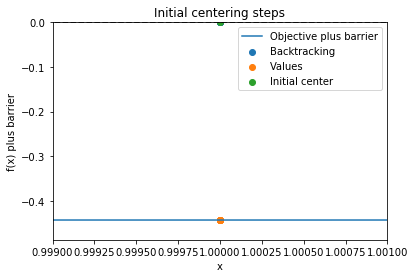

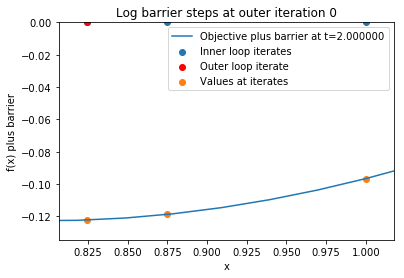

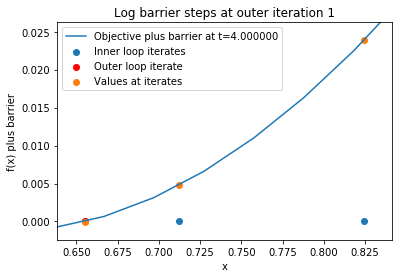

0.6551329622681582

In [35]:
def lb1D(x, a, b):
    '''
    Log barrier value of x between a and b
    :param x: x between a and b
    :param a: lower endpoint
    :param b: upper endpoint
    :return: evaluation of the log barrier function
    '''
    return -np.log(x-a)-np.log(b-x)

def dlb1D(x, a, b):
    '''
    Log barrier derivative at x between a and b
    :param x: x between a and b
    :param a: lower endpoint
    :param b: upper endpoint
    :return: evaluation of the log barrier derivative
    '''
    return 1/(b-x) - 1/(x-a)

def d2lb1D(x, a, b):
    '''
    Log barrier 2nd derivative x between a and b
    :param x: x between a and b
    :param a: lower endpoint
    :param b: upper endpoint
    :return: evaluation of the log barrier 2nd derivative
    '''
    return 1/((b-x)**2) + 1/((x-a)**2)


def log_barrier_opt_1D(a, b, x0, f, df, d2f=None, al=0.5, be=0.5, M=2, init_iter=5, out_iter=2, in_iter=2, verbose=False):
    '''
    Perform optimization of f using the log barrier method in 1D
    :param a: lower bound of feasible region
    :param b: upper bound of feasible region
    :param x0: inital guess -- must satisfy a < x0 < b or this breaks
    :param f: objective function
    :param df: derivative of objective function
    :param d2f: optional second derivative, invokes Newton steps
    :param al: alpha for the backtracking calls
    :param be: beta for the backtracking calls
    :param M: increase factor for t
    :param init_iter: number of initial backtracking calls
    :param out_iter: number of outer iterations to perform
    :param in_iter: number of inner iterations to perform
    :param verbose: True generates illustrative plots
    '''
    
    # First, approximate the solution with t=1
    x = x0
    if verbose:
        pts = [x0]
    
    for i in range(init_iter):
        flb = lambda z: f(z) + lb1D(z, a, b)
        dflb0 = df(x) + dlb1D(x, a, b)
        dx = -dflb0
        if d2f is not None:
            dx = dx / (d2f(x) + d2lb1D(x, a, b))
        x = backtracking1D(x, dx, flb, dflb0, alpha=al, beta=be)
        if verbose:
            pts.append(x)
            
    if verbose:
        s = np.linspace(a+1e-6, b-1e-6, 100)
        y = np.zeros(100)
        q = np.zeros(len(pts))
        for i in range(100):
            y[i] = flb(s[i])
        for i in range(len(pts)):
            q[i] = flb(pts[i])
        
        fl = min(np.min(q), 0)
        fu = max(np.max(q), 0)
            
        interval_length = np.max(pts) - np.min(pts)
        range_length = fu - fl
            
        l = np.min(pts) - 0.1*interval_length
        u = np.max(pts) + 0.1*interval_length
        fl = np.min(q) - 0.1*range_length
        fu = np.max(q) + 0.1*range_length
        
        plt.plot([s[0], s[-1]], [0, 0], 'k--')
        obj, =plt.plot(s, y, label='Objective plus barrier')
        bt =plt.scatter(pts, np.zeros(len(pts)), label='Backtracking')
        vals =plt.scatter(pts, q, label='Values')
        init =plt.scatter([pts[-1]], 0, label='Initial center')
        plt.axis([l, u, min(fl,0), max(fu,0)])
        plt.legend(handles=[obj, bt, vals, init])
        plt.xlabel('x')
        plt.ylabel('f(x) plus barrier')
        plt.title('Initial centering steps')
        plt.show()
    
    # Now begin the outer iterations
    t=1
    for i in range(out_iter):
        t = M * t
        if verbose:
            pts = [x]
        for j in range(in_iter):
            flb = lambda z: f(z) + lb1D(z, a, b)/t
            dflb0 = df(x) + dlb1D(x, a, b)/t
            dx = -dflb0
            if d2f is not None:
                dx = dx / (d2f(x) + d2lb1D(x, a, b)/t)
            x = backtracking1D(x, dx, flb, dflb0, alpha=al, beta=be)
            pts.append(x)
            
        if verbose:
            s = np.linspace(a+1e-6, b-1e-6, 100)
            y = np.zeros(100)
            q = np.zeros(len(pts))
            for k in range(100):
                y[k] = flb(s[k])
            for k in range(len(pts)):
                q[k] = flb(pts[k])
                
            fl = min(np.min(q), 0)
            fu = max(np.max(q), 0)
            
            interval_length = np.max(pts) - np.min(pts)
            range_length = fu - fl
            
            l = np.min(pts) - 0.1*interval_length
            u = np.max(pts) + 0.1*interval_length
            fl = np.min(q) - 0.1*range_length
            fu = np.max(q) + 0.1*range_length
        
            obj, =plt.plot(s, y, label=('Objective plus barrier at t=%f' % t))
            bt =plt.scatter(pts, np.zeros(len(pts)), label='Inner loop iterates')
            outer =plt.scatter([pts[-1]], 0, label='Outer loop iterate', color='red')
            vals =plt.scatter(pts, q, label='Values at iterates')
            plt.axis([l, u, min(fl, 0), max(fu, 0)])
            plt.legend(handles=[obj, bt, outer, vals])
            plt.xlabel('x')
            plt.ylabel('f(x) plus barrier')
            plt.title('Log barrier steps at outer iteration %d' % i)
            plt.show()
            
    return x

a=0
b=3
x0=1
f=lambda x: (x**2)/4
df=lambda x: x/2

x_approx = log_barrier_opt_1D(a, b, x0, f, df, verbose=True, out_iter=2)
x_approx

## Problem 5
$$
\Phi_Q^\prime(\alpha^{(k)})=\frac{1}{M} \sum_{j=1}^M \text{logit}\left(-\alpha^{(k)}x^{(i^{(j)})}y^{(i^{(j)})}\right)
$$
while
$$
\text{logit}(x) = \frac{1}{1+e^{-x}},
$$
  
$\alpha^{(1)} = \alpha^{(0)} - \gamma^{(0)}\Phi_{Q_1}^\prime(\alpha^{(0)})$  
$\space\space\space\space\space\space = 1 - \frac{1}{2}*\frac{1}{4}*\left[ logit(-(1)(-1)(-1))+ logit(-(1)(0)(-1))+logit(-(1)(1)(1))+logit(-(1)(1)(1)) \right]$  
$\space\space\space\space\space\space = 1 - \frac{1}{8}*\left[ 3*logit(-1)+ logit(0) \right]$  
$\space\space\space\space\space\space = 1 - \frac{1}{8}*\left[ \frac{3}{1+e}+\frac{1}{2} \right]$  
$\space\space\space\space\space\space = \frac{9+15e}{16+16e} = 0.83664696698625174$  
  
$\alpha^{(2)} = \alpha^{(1)} - \gamma^{(1)}\Phi_{Q_1}^\prime(\alpha^{(1)})$  
$\space\space\space\space\space\space = \frac{9+15e}{16+16e} - \frac{2}{5}*\frac{1}{4}*\left[ logit(-(\frac{9+15e}{16+16e})(-1)(-1))+ logit(-(\frac{9+15e}{16+16e})(-1)(-1))+logit(-(\frac{9+15e}{16+16e})(0)(1))+logit(-(\frac{9+15e}{16+16e})(1)(-1)) \right]$  
$\space\space\space\space\space\space = \frac{9+15e}{16+16e} - \frac{1}{10}*\left[ logit(-\frac{9+15e}{16+16e})+ logit(-\frac{9+15e}{16+16e})+logit(0)+logit(\frac{9+15e}{16+16e}) \right]$  
$\space\space\space\space\space\space = \frac{9+15e}{16+16e} - \frac{1}{10}*\left[ logit(\frac{9+15e}{16+16e})+2logit(-\frac{9+15e}{16+16e})+logit(0) \right]$  
$\space\space\space\space\space\space = 0.65642282287676201$  


In [39]:
logit = lambda x: 1/(1+np.exp(-x))
alpha1 = (9+15*np.exp(1))/(16+16*np.exp(1))
alpha2 = alpha1 - 0.1*(logit(alpha1) + 2*logit(-alpha1)+logit(0))
alpha2


0.65642282287676201